Вопросы:
1) Что делать с ссылками

2) Нужно ли чистить вопросы от кода

3) Что делать с разной длиной

4) Как использовать Tag

5) Идея кластеризации для обучения 

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [24]:
pd.set_option("display.max_colwidth", None)

In [2]:
data_path = "../data/StackSample/"

In [56]:
questions = pd.read_csv(data_path + "Questions.csv", encoding_errors="replace")
answers = pd.read_csv(data_path + "Answers.csv", encoding_errors="replace")
tags = pd.read_csv(data_path + "Tags.csv", encoding_errors="replace")

In [57]:
questions.rename(
    columns={"Body": "Q_Body", "Score": "Q_Score", "Title": "Q_Title"}, inplace=True
)
answers.rename(
    columns={"Body": "A_Body", "Score": "A_Score", "Id": "A_Id", "ParentId": "Id"},
    inplace=True,
)

In [58]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Q_Score,Q_Title,Q_Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in one statement,"<p>I've written a database generation script in <a href=""http://en.wikipedia.org/wiki/SQL"">SQL</a> and want to execute it in my <a href=""http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime"">Adobe AIR</a> application:</p>\n\n<pre><code>Create Table tRole (\n roleID integer Primary Key\n ,roleName varchar(40)\n);\nCreate Table tFile (\n fileID integer Primary Key\n ,fileName varchar(50)\n ,fileDescription varchar(500)\n ,thumbnailID integer\n ,fileFormatID integer\n ,categoryID integer\n ,isFavorite boolean\n ,dateAdded date\n ,globalAccessCount integer\n ,lastAccessTime date\n ,downloadComplete boolean\n ,isNew boolean\n ,isSpotlight boolean\n ,duration varchar(30)\n);\nCreate Table tCategory (\n categoryID integer Primary Key\n ,categoryName varchar(50)\n ,parent_categoryID integer\n);\n...\n</code></pre>\n\n<p>I execute this in Adobe AIR using the following methods:</p>\n\n<pre><code>public static function RunSqlFromFile(fileName:String):void {\n var file:File = File.applicationDirectory.resolvePath(fileName);\n var stream:FileStream = new FileStream();\n stream.open(file, FileMode.READ)\n var strSql:String = stream.readUTFBytes(stream.bytesAvailable);\n NonQuery(strSql);\n}\n\npublic static function NonQuery(strSQL:String):void\n{\n var sqlConnection:SQLConnection = new SQLConnection();\n sqlConnection.open(File.applicationStorageDirectory.resolvePath(DBPATH);\n var sqlStatement:SQLStatement = new SQLStatement();\n sqlStatement.text = strSQL;\n sqlStatement.sqlConnection = sqlConnection;\n try\n {\n sqlStatement.execute();\n }\n catch (error:SQLError)\n {\n Alert.show(error.toString());\n }\n}\n</code></pre>\n\n<p>No errors are generated, however only <code>tRole</code> exists. It seems that it only looks at the first query (up to the semicolon- if I remove it, the query fails). Is there a way to call multiple queries in one statement?</p>\n"
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for TortoiseSVN?,"<p>Are there any really good tutorials explaining <a href=""http://svnbook.red-bean.com/en/1.8/svn.branchmerge.html"" rel=""nofollow"">branching and merging</a> with Apache Subversion? </p>\n\n<p>All the better if it's specific to TortoiseSVN client.</p>\n"
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,"<p>Has anyone got experience creating <strong>SQL-based ASP.NET</strong> site-map providers?</p>\n\n<p>I've got the default XML file <code>web.sitemap</code> working properly with my Menu and <strong>SiteMapPath</strong> controls, but I'll need a way for the users of my site to create and modify pages dynamically.</p>\n\n<p>I need to tie page viewing permissions into the standard <code>ASP.NET</code> membership system as well.</p>\n"
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,"<p>This is something I've pseudo-solved many times and never quite found a solution. That's stuck with me. The problem is to come up with a way to generate <code>N</code> colors, that are as distinguishable as possible where <code>N</code> is a parameter.</p>\n"
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applications,"<p>I have a little game written in C#. It uses a database as back-end. It's \na <a href=""http://en.wikipedia.org/wiki/Collectible_card_game"">trading card game</a>, and I wanted to implement the function of the cards as a script.</p>\n\n<p>What I mean is that I essentially have an interface, <code>ICard</code>, which a card class implements (<code>public class Card056 : ICard</code>) and which contains function that are called by the game.</p>\n\n<p>Now, to make the thing maintainable/moddable, I would like to have the class for each card as source code in the database and essentially compile it on first use. So when I have to add/change a card, I

In [59]:
answers.head()

,A_Id,OwnerUserId,CreationDate,Id,A_Score,A_Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Version Control with Subversion</a></p>\r\n\r\n<p>A very good resource for source control in general. Not really TortoiseSVN specific, though.</p>"
1,124,26.0,2008-08-01T16:09:47Z,80,12,"<p>I wound up using this. It is a kind of a hack, but it actually works pretty well. The only thing is you have to be very careful with your semicolons. : D</p>\n\n<pre><code>var strSql:String = stream.readUTFBytes(stream.bytesAvailable); \nvar i:Number = 0;\nvar strSqlSplit:Array = strSql.split("";"");\nfor (i = 0; i &lt; strSqlSplit.length; i++){\n NonQuery(strSqlSplit[i].toString());\n}\n</code></pre>\n"
2,199,50.0,2008-08-01T19:36:46Z,180,1,"<p>I've read somewhere the human eye can't distinguish between less than 4 values apart. so This is something to keep in mind. The following algorithm does not compensate for this.</p>\r\n\r\n<p>I'm not sure this is exactly what you want, but this is one way to randomly generate non-repeating color values:</p>\r\n\r\n<p>(beware, inconsistent pseudo-code ahead)</p>\r\n\r\n<pre><code>//colors entered as 0-255 [R, G, B]<br>colors = []; //holds final colors to be used<br>rand = new Random();<br><br>//assumes n is less than 16,777,216<br>randomGen(int n){<br> while (len(colors) &lt; n){<br> //generate a random number between 0,255 for each color<br> newRed = rand.next(256);<br> newGreen = rand.next(256);<br> newBlue = rand.next(256);<br> temp = [newRed, newGreen, newBlue];<br> //only adds new colors to the array<br> if temp not in colors {<br> colors.append(temp);<br> }<br> }<br>}<br></code></pre>\r\n\r\n<p>One way you could optimize this for better visibility would be to compare the distance between each new color and all the colors in the array:</p>\r\n\r\n<pre><code>for item in color{<br> itemSq = (item[0]^2 + item[1]^2 + item[2]^2])^(.5);<br> tempSq = (temp[0]^2 + temp[1]^2 + temp[2]^2])^(.5);<br> dist = itemSq - tempSq;<br> dist = abs(dist);<br>}<br>//NUMBER can be your chosen distance apart.<br>if dist &lt; NUMBER and temp not in colors {<br> colors.append(temp);<br>}<br></code></pre>\r\n\r\n<p>But this approach would significantly slow down your algorithm.</p>\r\n\r\n<p>Another way would be to scrap the randomness and systematically go through every 4 values and add a color to an array in the above example.</p>"
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figured out that another Domain-Specific-Language (DSL) would be a bit too much.</p>\n\n<p>Essentially, they need to interact with my gamestate in possibly unpredictable ways. For example, a card could have a rule ""When this cards enter play, all your undead minions gain +3 attack against flying enemies, except when the enemy is blessed"". As trading card games are turn based, the GameState Manager will fire OnStageX events and let the cards modify other cards or the GameState in whatever way the card needs.</p>\n\n<p>If I try to create a DSL, I have to implement a rather large feature set and possibly constantly update it, which shifts the maintenance work to another part without actually removing it.</p>\n\n<p>That's why I wanted to stay with a ""real"" .NET language to essentially be able to just fire the event and let the card manipulate the gamestate in whatever way (within the limits of the code access security).</p>\n"
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Articles/8656/C-Script-The-Missing-Puzzle-Piece"">Oleg Shilo's C# Script solution (at The Code Project</a>) really is a great introduction to providing script abilities in your application.</p>\n\n<p>A different approach would be to consider a language that is specifically built for scripting, such as <a href=""http://en.wikipedia.org/wiki/IronRuby"">IronRuby</a>, <a href=""http://en.wikipedia.org/wiki/IronPython"">IronPython</a>, or <a href=""http://en.wikipedia.org/wiki/Lua_%28progr

# TODO
1) Проверить количество questions имеющих несколько answers // __Одному вопросу может соответствовать более одного ответа__

2) Понять как отбирать ответы // __Попрообовать отбирать вопросы и ответы, у которых score больше 5__

3) Отчистить Body questions и answers от html разметки

### 1. Точно ли на каждый вопрос имеется один ответ или их больше?
Нужно сопоставить __Id__ из answers и __Id__ из questions

In [60]:
answers["Id"].value_counts(sort=False)

90           3
80           3
180          9
260          9
330         10
            ..
40143190     2
40132400     1
40141860     1
40077010     1
40142910     1
Name: Id, Length: 1102568, dtype: int64

Рассмотрим конкретный пример, вопрос с Id = 90

In [62]:
question_90 = questions.loc[questions.Id == 90]

In [63]:
answer_90 = answers.loc[answers.Id == 90]

In [65]:
question_90.Q_Body

1    <p>Are there any really good tutorials explaining <a href="http://svnbook.red-bean.com/en/1.8/svn.branchmerge.html" rel="nofollow">branching and merging</a> with Apache Subversion? </p>\n\n<p>All the better if it's specific to TortoiseSVN client.</p>\n
Name: Q_Body, dtype: object

In [66]:
answer_90

,A_Id,OwnerUserId,CreationDate,Id,A_Score,A_Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Version Control with Subversion</a></p>\r\n\r\n<p>A very good resource for source control in general. Not really TortoiseSVN specific, though.</p>"
10748,202317,20709.0,2008-10-14T18:41:45Z,90,2,"<p>You can also try <em><a href=""http://www.codeproject.com/KB/work/XTortoiseSVN.aspx"" rel=""nofollow"">Version Control for the Standalone Programmer - Part 1</a></em> or perhaps <em><a href=""http://www.kenegozi.com/Blog/2007/07/30/merging-with-tortoisesvn.aspx"" rel=""nofollow"">Merging with TortoiseSVN</a></em>.</p>\n"
85572,1466832,16012.0,2009-09-23T15:40:46Z,90,19,"<p>My easy click-by-click instructions (<strong>specific to TortoiseSVN</strong>) are in Stack&nbsp;Overflow question <em><a href=""http://stackoverflow.com/questions/1461922"">What is the simplest way to do branching and merging using TortoiseSVN?</a></em>.</p>\n"


Видим, что вопросы могут содержать ссылки, прочтение содержания которых является ответом на вопрос

1) Код содержится внутри блоков __\<code>__, а картинки __\<img>__

2) Множество __\\n__, которые нужно отчистить // __точно ли нужно?__

3) Попробовать отчистить, оставив вопросы с ссылками без изменений, посмотреть на объём получившейся выборки

### 2. Объядинить таблицы, отчистить от тегов code, img, и имеющие score

In [77]:
print(*answers.columns, sep=", ")
print(*questions.columns, sep=", ")

A_Id, OwnerUserId, CreationDate, Id, A_Score, A_Body
Id, OwnerUserId, CreationDate, ClosedDate, Q_Score, Q_Title, Q_Body


Мерджим таблицы

In [88]:
q_a_df = pd.merge(
    questions[["Id", "Q_Score", "Q_Title", "Q_Body"]],
    answers[["Id", "A_Score", "A_Body"]],
    on="Id",
    how="left",
)

In [89]:
len(q_a_df)

2176164

Отбираем нужный score для вопроса и ответов

In [144]:
questions_score = 1
answers_score = 1
q_a_df.query(
    f"Q_Score >= {questions_score} and A_Score >= {answers_score}", inplace=True
)

In [145]:
len(q_a_df)

789027

### 3. Очистим от HTML разметки и посмотрим распределение длин

Отберем ответы и вопросы, где нет тегов _\<code>_ и _\<img>_

In [168]:
print(*q_a_df.columns, sep=", ")

Id, Q_Score, Q_Title, Q_Body, A_Score, A_Body


In [173]:
q_a_df = q_a_df[~q_a_df["A_Body"].str.contains("code")]
q_a_df = q_a_df[~q_a_df["A_Body"].str.contains("img")]
q_a_df = q_a_df[~q_a_df["Q_Body"].str.contains("img")]
q_a_df = q_a_df[~q_a_df["Q_Body"].str.contains("code")]

In [177]:
len(q_a_df)

76988

Преобразуем Title, Q_Body и A_Body в текст

In [180]:
q_a_df["Q_Body"] = q_a_df["Q_Body"].apply(lambda x: BeautifulSoup(x).get_text())
q_a_df["Q_Title"] = q_a_df["Q_Title"].apply(lambda x: BeautifulSoup(x).get_text())
q_a_df["A_Body"] = q_a_df["A_Body"].apply(lambda x: BeautifulSoup(x).get_text())

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


Посмотрим на рапсределение длин вопросов и ответов

In [188]:
q_a_df["Q_BodyLen"] = q_a_df["Q_Body"].apply(lambda x: len(x))
q_a_df["A_BodyLen"] = q_a_df["A_Body"].apply(lambda x: len(x))

Максимальная длина вопроса 25766
Средняя длина вопроса 495.1229931937445


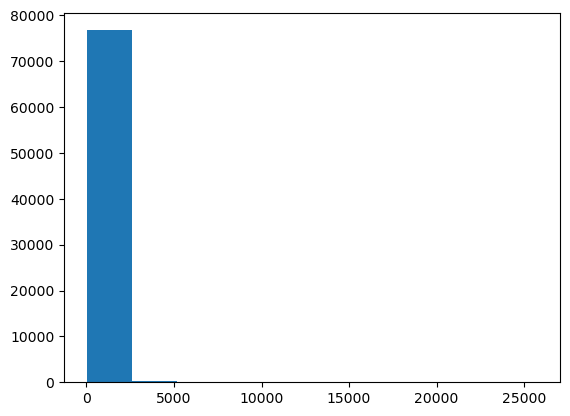

In [198]:
plt.hist(q_a_df["Q_BodyLen"])
print("Максимальная длина вопроса " + str(q_a_df["Q_BodyLen"].max()))
print("Средняя длина вопроса " + str(q_a_df["Q_BodyLen"].mean()))

Максимальная длина ответа 17487
Средняя длина ответа 427.57760949758404


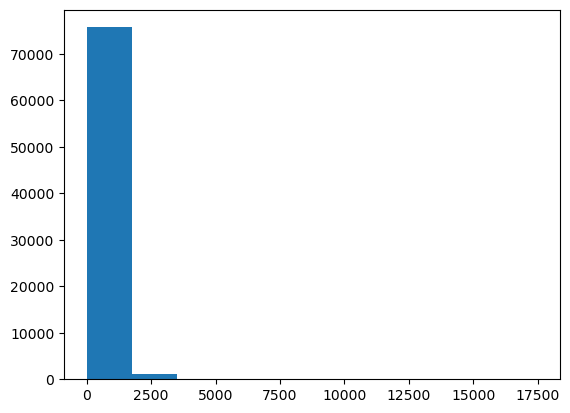

In [197]:
plt.hist(q_a_df["A_BodyLen"])
print("Максимальная длина ответа " + str(q_a_df["A_BodyLen"].max()))
print("Средняя длина ответа " + str(q_a_df["A_BodyLen"].mean()))

In [201]:
q_a_df.head(2)

,Id,Q_Score,Q_Title,Q_Body,A_Score,A_Body,Q_BodyLen,A_BodyLen
3,90,144,Good branching and merging tutorials for TortoiseSVN?,Are there any really good tutorials explaining branching and merging with Apache Subversion? \nAll the better if it's specific to TortoiseSVN client.\n,13.0,"Version Control with Subversion\nA very good resource for source control in general. Not really TortoiseSVN specific, though.",149,124
5,90,144,Good branching and merging tutorials for TortoiseSVN?,Are there any really good tutorials explaining branching and merging with Apache Subversion? \nAll the better if it's specific to TortoiseSVN client.\n,19.0,My easy click-by-click instructions (specific to TortoiseSVN) are in Stack Overflow question What is the simplest way to do branching and merging using TortoiseSVN?.\n,149,166


### Разделить полученные результаты на тренировочную, валидационную и тестовую выборки.

In [204]:
ready_df = q_a_df.copy()
ready_df.drop(columns=["Q_BodyLen", "A_BodyLen"], inplace=True)

In [207]:
len(ready_df)

76988

In [205]:
train, validate, test = np.split(
    ready_df.sample(frac=1, random_state=42),
    [int(0.65 * len(ready_df)), int(0.8 * len(ready_df))],
)

In [215]:
train.to_csv("../data/train.csv", sep="\t", index=False)
validate.to_csv("../data/val.csv", sep="\t", index=False)
test.to_csv("../data/test.csv", sep="\t", index=False)